# Register Individual Macaque MRI Data to Templates

**Authors:** Nikoloz Sirmpilatze (nsirmpilatze@dpz.eu) & Chris Klink (c.klink@nin.knaw.nl)                

**Last updated:** May 8th, 2020     

**Requirements:**    
* _python_ >= 3.7
* _nipype_ >= 1.2.0
* _nilearn_ >= 0.5.2
    * Used only for visualisation
* _nibabel_ >= 2.3.3
* _joblib_ >= 0.14.1
    * Used only for parallel processing, not necessary when registrations are done serially
* _ANTs_ >= 2.4.0
    * _antsRegistration_,  _antsApplyTransforms_ and _antsAverageImages_ need to be in your path as executables    

**Citation**: Sirmpilatze, Nikoloz and Klink, P. Christiaan (2020). RheMAP: Non-linear warps between common rhesus macaque brain templates (Version 1)[Data set]. Zenodo. https://doi.org/10.5281/zenodo.3668510    

The following templates are used: 
1. [NMT v1.2](https://github.com/jms290/NMT)
2. [NMT v1.3](https://github.com/jms290/NMT)
3. [D99](https://afni.nimh.nih.gov/Macaque)
4. [INIA19](https://www.nitrc.org/projects/inia19/https://www.nitrc.org/projects/inia19/)
5. [MNI macaque](http://www.bic.mni.mcgill.ca/ServicesAtlases/Macaque)
6. [Yerkes19](https://github.com/Washington-University/NHPPipelines)   
7. [NMT v2.0 (4 templates)](https://github.com/jms290/NMT) (NB! at the time of writing, NMTv2.0 was not online yet)      

**NB!** We do not provide copies of the actual templates (licenses often forbids redistribution), but instead suggest you follow the links above and get them at the source. We do offer the warp files and warped templates that will be produced by this workflow. They can be downloaded from Zenodo (DOI:10.5281/zenodo.3668510). 

If you want to emulate this code, you can consider setting up your templates in the following folder structure:    

|--- RheMAP   
&emsp; |--- notebooks     
&emsp; |--- templates     
&emsp; &emsp; |--- D99     
&emsp; &emsp; &emsp; |--- D99_atlas_1.2a.nii.gz     
&emsp; &emsp; &emsp; |--- D99_atlas_1.2a_in_MNI.nii.gz     
&emsp; &emsp; &emsp; |--- D99_template.nii.gz      
&emsp; &emsp; |--- INIA   
&emsp; &emsp; &emsp; |--- inia19-t1-brain_truncated.nii.gz      
&emsp; &emsp; |--- MNI     
&emsp; &emsp; &emsp; |--- macaque_25_model-MNI_brain.nii.gz      
&emsp; &emsp; |--- NMT     
&emsp; &emsp; &emsp; |--- NMT_v1.2     
&emsp; &emsp; &emsp; &emsp; |--- NMT_SS.nii.gz      
&emsp; &emsp; &emsp; |--- NMT_v1.3     
&emsp; &emsp; &emsp; &emsp; |--- NMT_SS.nii.gz     
&emsp; &emsp; |--- YRK      
&emsp; &emsp; &emsp; |--- MacaqueYerkes19_T1w_0.5mm_brain.nii.gz       
&emsp; |--- subjects     
&emsp; &emsp; |--- SUBJ-01     
&emsp; &emsp; &emsp; |--- SUBJ-01_T1.nii.gz      
&emsp; &emsp; |--- SUBJ-02      
&emsp; &emsp; &emsp; |--- SUBJ-01_T1.nii.gz     

After downloading the warp files and warped templates from [Zenodo](https://zenodo.org/record/3776856#.XqqfI3UzZjE), we suggest you include them like this:      

|--- RheMAP   
&emsp; |--- notebooks     
&emsp; |--- templates     
&emsp; |--- warps       
&emsp; &emsp; |--- final     
&emsp; &emsp; &emsp; |--- D99_to_INIA_CompositeWarp.nii.gz     
&emsp; &emsp; &emsp; |--- D99_to_MNI_CompositeWarp.nii.gz      
&emsp; &emsp; &emsp; |--- etc   
&emsp; &emsp; |--- linear     
&emsp; &emsp; &emsp; |--- D99_to_INIA_affine_0GenericAffine.mat     
&emsp; &emsp; &emsp; |--- D99_to_MNI_affine_0GenericAffine.mat     
&emsp; &emsp; &emsp; |--- etc   
&emsp; &emsp; |--- nonlinear     
&emsp; &emsp; &emsp; |--- D99_to_INIA_1InverseWarp.nii.gz     
&emsp; &emsp; &emsp; |--- D99_to_INIA_1Warp.nii.gz     
&emsp; &emsp; &emsp; |--- D99_to_MNI_1InverseWarp.nii.gz     
&emsp; &emsp; &emsp; |--- D99_to_MNI_1Warp.nii.gz  
&emsp; &emsp; &emsp; |--- etc   
&emsp; |--- warped_templates       
&emsp; &emsp; |--- final     
&emsp; &emsp; &emsp; |--- D99_in_INIA_composite.nii.gz     
&emsp; &emsp; &emsp; |--- D99_in_MNI_composite.nii.gz       
&emsp; &emsp; &emsp; |--- etc   
&emsp; &emsp; |--- linear     
&emsp; &emsp; &emsp; |--- D99_in_INIA_linear.nii.gz    
&emsp; &emsp; &emsp; |--- D99_in_MNI_linear.nii.gz          
&emsp; &emsp; &emsp; |--- etc   
&emsp; &emsp; |--- nonlinear     
&emsp; &emsp; &emsp; |--- D99_in_INIA_linear+SyN.nii.gz     
&emsp; &emsp; &emsp; |--- D99_in_MNI_linear+SyN.nii.gz     
&emsp; &emsp; &emsp; |--- etc  

Based on the warp files and warped templates you could of course reconstruct the original templates with something like the following.     

On the command line:     
```bash
antsApplyTransforms -i <TEMPLATE1_in_TEMPLATE2_composite.nii.gz> \
                    -r <TEMPLATE2_in_TEMPLATE1.nii.gz> \        
                    -o <RECONSTRUCTED_ORIGINAL_TEMPLATE1.nii.gz> \
                    -t [<TEMPLATE1_to_TEMPLATE2_CompositeWarp>,1] \
                    -n Linear \
                    -d 3
```    

In NiPype:     
```python
import nipype.interfaces.ants as ants    
ants.ApplyTransforms(
            input_image=<TEMPLATE1_in_TEMPLATE2_composite.nii.gz>,
            reference_image=<TEMPLATE2_in_TEMPLATE1.nii.gz>,        
            output_image=<RECONSTRUCTED_ORIGINAL_TEMPLATE1.nii.gz>,
            transforms=<TEMPLATE1_to_TEMPLATE2_CompositeWarp>,
            invert_transform_flags=True,
            interpolation='Linear',
            dimension=3)
```

## Step 0: Preparations

### 0a. Import required libraries

In [1]:
import os
import glob
import time
import shutil as sh
import nibabel as nb

from itertools import combinations
from matplotlib import pyplot as plt

import nipype.interfaces.fsl as fsl # nipype interface for FSL
import nipype.interfaces.ants as ants # nipype interface for ANTs
from nilearn.plotting import plot_anat # Plotting function from nilearn

200508-15:31:08,932 nipype.utils INFO:
	 No new version available.


### 0b. Define relative paths to files

The skull-stripped isotropic volumetric images are used for registration.
* For **NMT**, **D99**, and **YRK** the provided skull-stripped brains were used
* In **INIA** the brain stem extends further down the spinal cord compared to the other temlplates, so the braisn stem was truncated at a level similar to the others
* No skull-stripped image was provided with **MNI**, so the brain was segmented semi-manually using ITK-SNAP
* For **YRK** we used the version provided together with [NHPPipelines](https://github.com/Washington-University/NHPPipelines)

First let's specify the template paths

In [2]:
# ============================================
# NB! THIS COULD BE DIFFERENT FOR EVERY USER
# ============================================
BASE_path     = os.path.dirname(os.getcwd()) + '/'   # repo base folder

# these follow the directory structure as outline above
TEMPLATE_path = BASE_path + 'templates/'                   # templates base folder
NMTv12_path   = TEMPLATE_path + 'NMT/NMT_v1.2/'
NMTv13_path   = TEMPLATE_path + 'NMT/NMT_v1.3/'
NMTv20_path   = TEMPLATE_path + 'NMT/NMT_v2.0/'
D99_path      = TEMPLATE_path + 'D99/'
INIA_path     = TEMPLATE_path + 'INIA/'
MNI_path      = TEMPLATE_path + 'MNI/'
YRK_path      = TEMPLATE_path + 'YRK/'

In [3]:
NMTv12_brain = NMTv12_path + 'NMT_SS.nii.gz'
NMTv13_brain = NMTv13_path + 'NMT_SS.nii.gz'
NMTv20_acpc_sym_brain = NMTv20_path + 'NMT_acpc_sym_2.0_SS.nii.gz'
NMTv20_acpc_asym_brain = NMTv20_path + 'NMT_acpc_asym_2.0_SS.nii.gz'
NMTv20_stereo_sym_brain = NMTv20_path + 'NMT_stereo_sym_2.0_SS.nii.gz'
NMTv20_stereo_asym_brain = NMTv20_path + 'NMT_stereo_asym_2.0_SS.nii.gz'
D99_brain    = D99_path + 'D99_template.nii.gz'
INIA_brain   = INIA_path + 'inia19-t1-brain_truncated.nii.gz'
MNI_brain    = MNI_path + 'macaque_25_model-MNI_brain.nii.gz'
YRK_brain    = YRK_path + 'MacaqueYerkes19_T1w_0.5mm_brain.nii.gz'

Now create a list of only the templates you want to calculate warps for

In [4]:
# # all
# temp_names   = ['NMTv1.2', 'NMTv1.3',
#                 'NMTv2.0_acpc_sym','NMTv2.0_acpc_asym',
#                 'NMTv2.0_stereo_sym','NMTv2.0_stereo_asym',
#                 'D99', 'INIA', 'MNI', 'YRK']
# temp_brains  = [NMTv12_brain, NMTv13_brain, 
#                 NMTv20_acpc_sym_brain, NMTv20_acpc_asym_brain,
#                 NMTv20_stereo_sym_brain,NMTv20_stereo_asym_brain,
#                 D99_brain, INIA_brain, MNI_brain, YRK_brain]

# selected
temp_names   = ['NMTv1.3','NMTv2.0_stereo_sym']
temp_brains  = [NMTv13_brain,NMTv20_stereo_sym_brain]

# strength of contrast in the plot_anat function ("dim")
contrasts = [0]*len(temp_brains) # create a list of zeros because this should exist
contrasts = [-1, 0, 0, 0, 0, 0, 0, -1, -0.5, 0] # specify to improve display

Now the individual anatomical you would like to warp to a template space. Use a skull-stripped version. Highest resolution and contrast you have available (consider averaging multiple scans).

In [5]:
SUBJECT_path = BASE_path + 'subjects/' 
SUBJ_01_path = SUBJECT_path + 'Danny/'
SUBJ_02_path = SUBJECT_path + 'Eddy/'

In [6]:
SUBJ_01_brain = SUBJ_01_path + 'Danny_brain.nii.gz'
SUBJ_02_brain = SUBJ_02_path + 'Eddy2019_brain.nii.gz'

subj_names   = ['Danny', 'Eddy2019']
subj_brains  = [SUBJ_01_brain, SUBJ_02_brain]

subj_contrasts = [0]*len(subj_brains) # create a list of zeros because this should exist

Concatenate the templates and subject into one list for easy handling (within this notebook we will later exclude template-to-tamplate warping)

In [7]:
all_names = subj_names + temp_names
all_brains = subj_brains + temp_brains 

### 0c. Plot individual ssubject brains

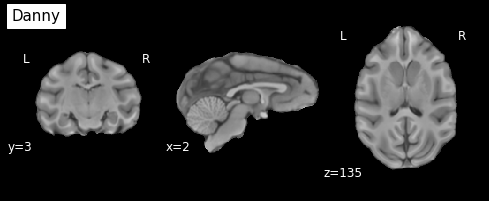

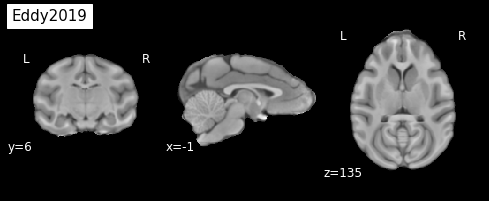

In [8]:
for name, brain,con in zip(subj_names, subj_brains, subj_contrasts):
    plot_anat(brain, display_mode='ortho', title=name, 
              draw_cross=False, annotate=True, dim=con);
    plt.savefig(name + '_brain.png'); # save png
    plt.draw()

### 0d. Parallel or serial    
Registration can be a time consuming process. If you have the resources, you may opt to parallelize some of the steps. You can configure that here.

In [9]:
do_parallel = True # Set to True for parallel processing
par_numjobs = 5     # How many parallel processes? This is only used when do_parallel is True
if do_parallel is True:
    from joblib import Parallel, delayed

## Step 1: Linear registration
* This is performed using [ANTs](http://stnava.github.io/ANTs/) **Affine** registration (12 degrees of freedom: 3 translations + 3 rotations + 3 scalings + 3 shears)
* The _antsRegistration_ function is called through its [nipype wrapper](https://nipype.readthedocs.io/en/latest/interfaces/generated/interfaces.ants/registration.html#registration).
* [Anatomy of an antsRegistration call](https://github.com/ANTsX/ANTs/wiki/Anatomy-of-an-antsRegistration-call) does a good job of explaining what the various parameters mean.

### 1a. Define function

In [10]:
def register_linear(moving, target,
                    moving_prefix, target_prefix,
                    subj_names,include_sub2sub=False):
    """Linearly registers moving image to target image

    Parameters
    ----------
    moving: 3D NIFTI image file
    target: 3D NIFTI image file
    moving_prefix: string
        one of the template/subj names 
        is used in the naming of output files
    target_prefix: string
        one of the template/subj names 
        is used in the naming of output files
    subj_names: list
        list of ssubjects to include in execution
        will only run registration if 'moving' or 'target' is on this list
    include_sub2sub: boolean
        Boolean that determines whether warps between subjects are calculated
        Default is false (not calculated)
    
    Return
    ------
    Linear transformation matrix
        file named as '{moving_prefix}_to_{target_prefix}_0GenericAffine.mat'
    Transformed image
        moving image transformed into target image space
        file named as: {moving_prefix}_in_{target_prefix}_linear.nii.gz
    """

    # Check whether this combinations should be done
    DoFunc=False
    if include_sub2sub and (moving_prefix in subj_names or target_prefix in subj_names):
        DoFunc=True
    if not include_sub2sub and ((moving_prefix in subj_names and target_prefix not in subj_names) or (moving_prefix not in subj_names and target_prefix in subj_names)):
        DoFunc=True
           
    # run it   
    if DoFunc: 
        rgstr = ants.registration.Registration(
               dimension=3,
               float=False,
               fixed_image=target,
               moving_image=moving,
               output_transform_prefix='{0}_to_{1}_affine_'.format(moving_prefix, target_prefix),
               output_warped_image='{0}_in_{1}_linear.nii.gz'.format(moving_prefix, target_prefix),
               initial_moving_transform_com=0,
               winsorize_lower_quantile=0.05,
               winsorize_upper_quantile=0.95,
               interpolation='Linear',
               use_histogram_matching=[True],
               transforms=['Affine'],
               transform_parameters=[(0.1,)],
               metric=['MI'],
               metric_weight=[1],
               radius_or_number_of_bins=[32],
               sampling_strategy=['Regular'],
               sampling_percentage=[0.2],
               number_of_iterations=[[1000, 500, 250, 100]],
               convergence_threshold=[1e-6],
               convergence_window_size=[10],
               shrink_factors=[[8, 4, 2, 1]],
               smoothing_sigmas=[[3, 2, 1, 0]],
               sigma_units=['vox'])
    
        rgstr.run()

### 1b. Apply function to register all unique template pairs

In [11]:
if do_parallel: # parallel
    print('\nPerforming linear registration in parallel...')
    start_time = time.time()
    Parallel(n_jobs=par_numjobs, backend='multiprocessing')(
        delayed(register_linear)
        (brains[0], brains[1], names[0],names[1], subj_names, include_sub2sub=False) 
        for names, brains in zip(combinations(all_names, 2), combinations(all_brains, 2)))
    end_time = time.time()
    print('Linear registration completed in  {0:.2f} minutes'.format((end_time - start_time)/60))
        
else: # serial
    for names, brains in zip(combinations(all_names, 2), combinations(all_brains, 2)):
        
        # explicit here for clarity
        mov_pref = names[0]
        targ_pref = names[1]
        mov_brain = brains[0]
        targ_brain = brains[1]
    
        print('\nLinearly registering {0} to {1} template...'.format(mov_pref, targ_pref))
        start_time = time.time()
        register_linear(mov_brain, targ_brain, mov_pref, targ_pref, subj_names, include_sub2sub=False)
        end_time = time.time()
        print('Linear registration completed in  {0:.2f} minutes'.format((end_time - start_time)/60))


Performing linear registration in parallel...
Linear registration completed in  9.80 minutes


### 1c. Visualize linear registration results

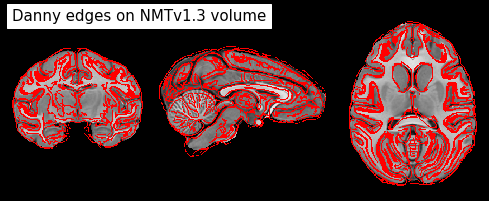

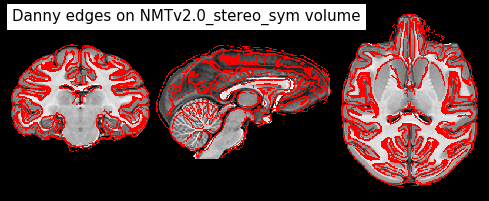

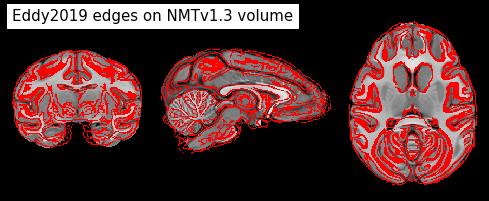

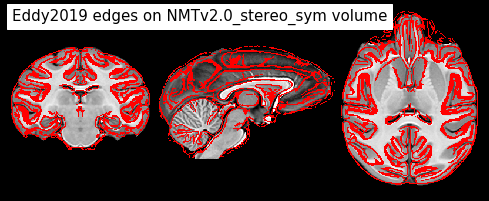

In [12]:
for names, brains in zip(combinations(all_names, 2), combinations(all_brains, 2)):

    mov_pref = names[0]
    targ_pref = names[1]
    mov_brain = brains[0]
    targ_brain = brains[1]
    targ_index = all_names.index(targ_pref)

    # only do this for exiting pairs
    if os.path.isfile(os.getcwd() + '/{0}_in_{1}_linear.nii.gz'.format(mov_pref, targ_pref)):      
        display = plot_anat(targ_brain, display_mode='ortho',
                            title='{0} edges on {1} volume'.format(mov_pref, targ_pref),
                            draw_cross=False, annotate=False, dim=contrasts[targ_index])
        brain = '{0}_in_{1}_linear.nii.gz'.format(mov_pref, targ_pref)
        display.add_edges(brain)
        plt.savefig('Linear_{0}_on_{1}.png'.format(mov_pref, targ_pref))
        plt.draw()

## Step 2: Non-linear registration
* Symmetric Diffeomorphic ([SyN](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2276735/)) registration is performed using [ANTs](http://stnava.github.io/ANTs/).
* The starting point for this step is the transformed image from the previous (linear) step
* The _antsRegistration_ function is called through its [nipype wrapper](https://nipype.readthedocs.io/en/latest/interfaces/generated/interfaces.ants/registration.html#registration).
* [Anatomy of an antsRegistration call](https://github.com/ANTsX/ANTs/wiki/Anatomy-of-an-antsRegistration-call) does a good job of explaining what the various parameters mean.

### 2a. Define function

In [13]:
def register_SyN(moving, target,
                 moving_prefix, target_prefix,
                 subj_names,include_sub2sub=False):
    """Non-linearly registers moving image to target image using ANTs SyN

    Parameters
    ----------
    Same as register_linear function

    Return
    ------
    Non-linear forward warp
        file named as '{moving_prefix}_to_{target_prefix}_1Warp.nii.gz'
    Non-linear backward warp (inverse of the above)
        file named as '{moving_prefix}_to_{target_prefix}_1InverseWarp.nii.gz'
    Transformed image
        moving image transformed into target image space
        file named as: {moving_prefix}_in_{target_prefix}_linear+SyN.nii.gz
    """
    
    # Check whether this combinations should be done
    DoFunc=False
    if include_sub2sub and (moving_prefix in subj_names or target_prefix in subj_names):
        DoFunc=True
    if not include_sub2sub and ((moving_prefix in subj_names and target_prefix not in subj_names) or (moving_prefix not in subj_names and target_prefix in subj_names)):
        DoFunc=True
           
    # run it   
    if DoFunc: 
        rgstr = ants.registration.Registration(
               dimension=3,
               float=False,
               fixed_image=target,
               moving_image=moving,
               output_transform_prefix='{0}_to_{1}_'.format(moving_prefix, target_prefix),
               output_warped_image='{0}_in_{1}_linear+SyN.nii.gz'.format(moving_prefix, target_prefix),
               initial_moving_transform_com=0,
               winsorize_lower_quantile=0.05,
               winsorize_upper_quantile=0.95,
               interpolation='Linear',
               use_histogram_matching=[True],
               transforms=['SyN'],
               transform_parameters=[(0.1,)],
               metric=['CC'],
               metric_weight=[1],
               radius_or_number_of_bins=[4],
               sampling_strategy=['Regular'],
               sampling_percentage=[0.2],
               number_of_iterations=[[500, 200, 50]],
               convergence_threshold=[1e-6],
               convergence_window_size=[10],
               shrink_factors=[[8, 4, 2]],
               smoothing_sigmas=[[3, 2, 1]],
               sigma_units=['vox'])

        rgstr.run()

### 2b. Apply function to register all unique template pairs    

In [14]:
if do_parallel: # parallel
    print('\nPerforming non-linear registration in parallel...')
    start_time = time.time()
    Parallel(n_jobs=par_numjobs, backend='multiprocessing')(
        delayed(register_SyN)
        ('{0}_in_{1}_linear.nii.gz'.format(names[0], names[1]), brains[1], names[0], names[1], subj_names, include_sub2sub=False) 
        for names, brains in zip(combinations(all_names, 2), combinations(all_brains, 2)))
    end_time = time.time()
    print('Non-linear registration completed in  {0:.2f} minutes'.format((end_time - start_time)/60))
    
else: # serial
    for names, brains in zip(combinations(all_names, 2), combinations(all_brains, 2)):

        # explicit here for clarity
        mov_pref = names[0]
        targ_pref = names[1]
        mov_brain = '{0}_in_{1}_linear.nii.gz'.format(mov_pref, targ_pref)
        targ_brain = brains[1]
    
        print('\nNon-linearly registering {0} to {1} template...'.format(mov_pref, targ_pref))
        start_time = time.time()
        register_SyN(mov_brain, targ_brain, mov_pref, targ_pref, subj_names, include_sub2sub=False)
        end_time = time.time()
        print('Non-linear registration completed in  {0:.2f} minutes'.format((end_time - start_time)/60))


Performing non-linear registration in parallel...
Non-linear registration completed in  133.63 minutes


### 2c: Visualize non-linear registration results

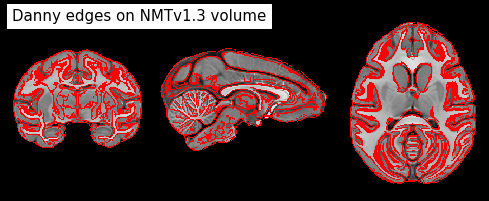

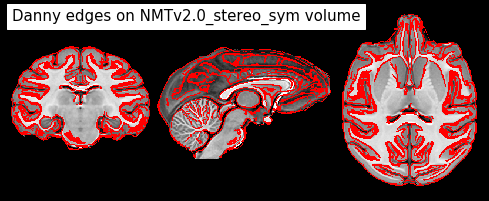

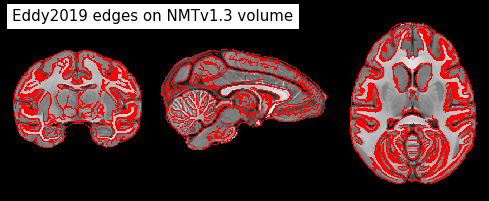

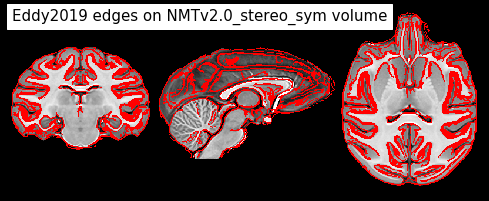

In [15]:
for names, brains in zip(combinations(all_names, 2), combinations(all_brains, 2)):

    mov_pref = names[0]
    targ_pref = names[1]
    targ_brain = brains[1]
    targ_index = all_names.index(targ_pref)

        # only do this for exiting pairs
    if os.path.isfile(os.getcwd() + '/{0}_in_{1}_linear+SyN.nii.gz'.format(mov_pref, targ_pref)):
        display = plot_anat(targ_brain, display_mode='ortho',
                            title='{0} edges on {1} volume'.format(mov_pref, targ_pref),
                            draw_cross=False, annotate=False, dim=contrasts[targ_index])
        brain = '{0}_in_{1}_linear+SyN.nii.gz'.format(mov_pref, targ_pref)
        display.add_edges(brain)
        plt.savefig('Nonlinear_{0}_on_{1}.png'.format(mov_pref, targ_pref))
        plt.draw()

## Step 3: Derive composite warps by combining linear and non-linear steps
* This is done with the _antsApplyTransforms_ function, using its [nipype wrapper](https://nipype.readthedocs.io/en/latest/interfaces/generated/interfaces.ants/resampling.html#applytransforms).
* **Caution:** the order with which transforms are passed is akin to linear algebra notation, so first transform is applied last
* Both forward (templateA-to-templateB) and backward (templateB-to-templateA) warps are computed

### 3a. Define function

In [16]:
def combine_transforms(moving, target,
                       moving_prefix, target_prefix,
                       subj_names,include_sub2sub=False):

    """Combines linear transform with non-linear warp to generate a composite warp

    Parameters
    ----------
    Same as register_linear function

    Return
    ------
    Composite forward warp
        file named as '{moving_prefix}_to_{target_prefix}_CompositeWarp.nii.gz'
    Composite backward warp (inverse of the above)
        file named as '{target_prefix}_to_{moving_prefix}_CompositeWarp.nii.gz'
    """
    
    # Check whether this combinations should be done
    DoFunc=False
    if include_sub2sub and (moving_prefix in subj_names or target_prefix in subj_names):
        DoFunc=True
    if not include_sub2sub and ((moving_prefix in subj_names and target_prefix not in subj_names) or (moving_prefix not in subj_names and target_prefix in subj_names)):
        DoFunc=True
           
    # run it   
    if DoFunc: 
        forward = ants.ApplyTransforms(
                input_image=moving,
                output_image='{0}_to_{1}_CompositeWarp.nii.gz'.format(moving_prefix, target_prefix),
                reference_image=target,
                transforms=['{0}_to_{1}_1Warp.nii.gz'.format(moving_prefix, target_prefix),
                            '{0}_to_{1}_affine_0GenericAffine.mat'.format(moving_prefix, target_prefix)],
                dimension=3,
                print_out_composite_warp_file=True)
        forward.run()

        backward = ants.ApplyTransforms(
                input_image=target,
                output_image='{1}_to_{0}_CompositeWarp.nii.gz'.format(moving_prefix, target_prefix),
                reference_image=moving,
                transforms=['{0}_to_{1}_affine_0GenericAffine.mat'.format(moving_prefix, target_prefix),
                            '{0}_to_{1}_1InverseWarp.nii.gz'.format(moving_prefix, target_prefix)],
                invert_transform_flags=[True, False], # invert the linear transform
                dimension=3,
                print_out_composite_warp_file=True)

        backward.run()

### 3b. Apply function to generate all composite warp pairs

In [17]:
if do_parallel: # parallel
    print('\nCreating composite warps in parallel...')
    start_time = time.time()
    Parallel(n_jobs=par_numjobs, backend='multiprocessing')(
        delayed(combine_transforms)
        (brains[0], brains[1], names[0], names[1], subj_names, include_sub2sub=False) 
        for names, brains in zip(combinations(all_names, 2), combinations(all_brains, 2)))
    end_time = time.time()
    print('Composite warps computed in {0:.2f} minutes'.format((end_time - start_time)/60))
    
else: # serial
    for names, brains in zip(combinations(all_names, 2), combinations(all_brains, 2)):

        # make explicit here
        mov_pref = names[0]
        targ_pref = names[1]
        mov_brain = brains[0]
        targ_brain = brains[1]

        print('\nCreating composite warps between {0} and {1} templates...'.format(mov_pref, targ_pref))
        start_time = time.time()
        combine_transforms(mov_brain, targ_brain, mov_pref, targ_pref, subj_names, include_sub2sub=False)
        end_time = time.time()
        print('Composite warps computed in {0:.2f} minutes'.format((end_time - start_time)/60))


Creating composite warps in parallel...
Composite warps computed in 0.83 minutes


### 3c. Visually assess the derived composite warp pairs
* First use the derived composite warps to transform brains in both directions

In [23]:
for names, brains in zip(combinations(all_names, 2), combinations(all_brains, 2)):

    mov_pref = names[0]
    targ_pref = names[1]
    mov_brain = brains[0]
    targ_brain = brains[1]
    
    if os.path.isfile(os.getcwd() + '/{0}_to_{1}_CompositeWarp.nii.gz'.format(mov_pref, targ_pref)):
        forward = ants.ApplyTransforms(
                input_image=mov_brain,
                output_image='{0}_in_{1}_composite.nii.gz'.format(mov_pref, targ_pref),
                reference_image=targ_brain,
                transforms=['{0}_to_{1}_CompositeWarp.nii.gz'.format(mov_pref, targ_pref)],
                dimension=3)
        backward = ants.ApplyTransforms(
                input_image=targ_brain,
                output_image='{1}_in_{0}_composite.nii.gz'.format(mov_pref, targ_pref),
                reference_image=mov_brain,
                transforms=['{1}_to_{0}_CompositeWarp.nii.gz'.format(mov_pref, targ_pref)],
                dimension=3)

        print('\nTransforming {0} into {1} space...'.format(mov_pref, targ_pref))
        start_time = time.time()
        forward.run()
        end_time = time.time()
        print('Transformation complete in {0:.2f} minutes'.format((end_time - start_time)/60))
        print('Transforming {1} into {0} space...'.format(mov_pref, targ_pref))
        start_time = time.time()
        backward.run()
        end_time = time.time()
        print('Transformation complete in {0:.2f} minutes'.format((end_time - start_time)/60))


Transforming Danny into NMTv1.3 space...
Transformation complete in 0.18 minutes
Transforming NMTv1.3 into Danny space...
Transformation complete in 0.04 minutes

Transforming Danny into NMTv2.0_stereo_sym space...
Transformation complete in 0.14 minutes
Transforming NMTv2.0_stereo_sym into Danny space...
Transformation complete in 0.04 minutes

Transforming Eddy2019 into NMTv1.3 space...
Transformation complete in 0.18 minutes
Transforming NMTv1.3 into Eddy2019 space...
Transformation complete in 0.04 minutes

Transforming Eddy2019 into NMTv2.0_stereo_sym space...
Transformation complete in 0.14 minutes
Transforming NMTv2.0_stereo_sym into Eddy2019 space...
Transformation complete in 0.04 minutes


* Then, overlay the transformed (by composite warps) brains on target brains for visualization
* two plots (forward/backward) will be generated for each template pair

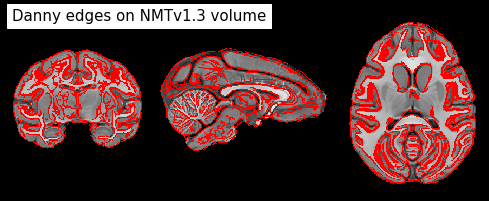

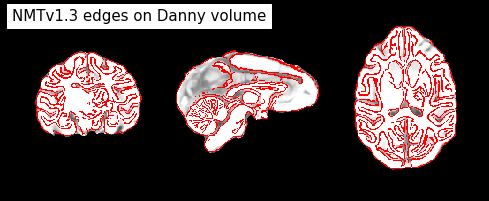

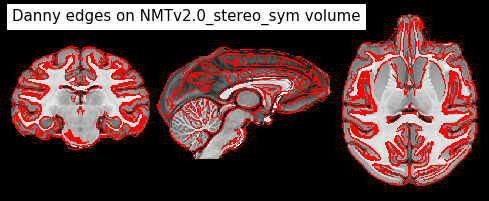

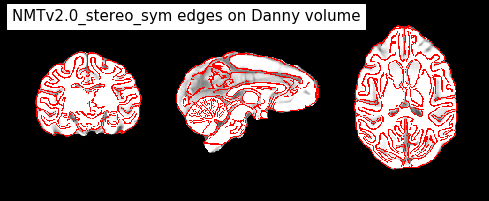

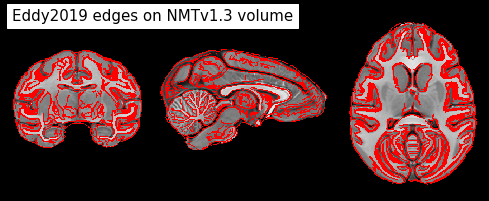

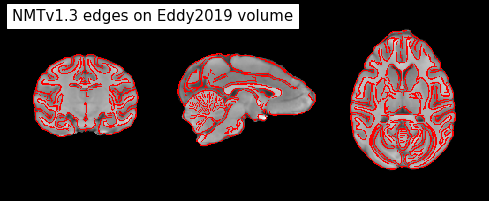

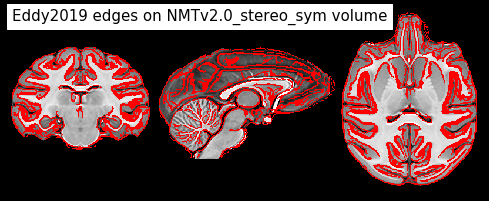

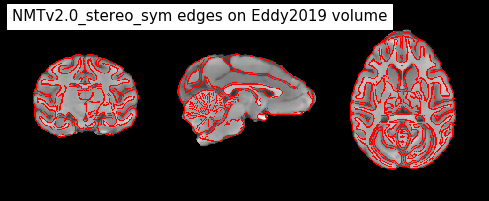

In [24]:
for names, brains in zip(combinations(all_names, 2), combinations(all_brains, 2)):

    mov_pref = names[0]
    targ_pref = names[1]
    mov_brain = brains[0]
    targ_brain = brains[1]
    mov_index = all_names.index(mov_pref)
    targ_index = all_names.index(targ_pref)

    if os.path.isfile(os.getcwd() + '/{0}_in_{1}_composite.nii.gz'.format(mov_pref, targ_pref)):
        display = plot_anat(targ_brain, display_mode='ortho',
                            title='{0} edges on {1} volume'.format(mov_pref, targ_pref),
                            draw_cross=False, annotate=False, dim=contrasts[targ_index])
        brain = '{0}_in_{1}_composite.nii.gz'.format(mov_pref, targ_pref)
        display.add_edges(brain)
        plt.savefig('Composite_{0}_on_{1}.png'.format(mov_pref, targ_pref))
        plt.draw()

        display = plot_anat(mov_brain, display_mode='ortho',
                            title='{1} edges on {0} volume'.format(mov_pref, targ_pref),
                            draw_cross=False, annotate=False, dim=contrasts[mov_index])
        brain = '{1}_in_{0}_composite.nii.gz'.format(mov_pref, targ_pref)
        display.add_edges(brain)
        plt.savefig('Composite_{1}_on_{0}.png'.format(mov_pref, targ_pref))
        plt.draw()
        plt.show()

### 4. Clean-up
* Create subfolders for linear and non-linear warps, and for the warped volumes
* Put all files in sensible subfolders

In [25]:
os.makedirs(SUBJECT_path + "warps/linear" , exist_ok=True)
os.makedirs(SUBJECT_path + "warps/nonlinear" , exist_ok=True)
os.makedirs(SUBJECT_path + "warps/final" , exist_ok=True)

[os.rename(os.getcwd() + '/' + f, SUBJECT_path + "warps/linear/" + f) for f in glob.glob('*_affine_*Affine.mat')];
[os.rename(os.getcwd() + '/' + f, SUBJECT_path + "warps/nonlinear/" + f) for f in glob.glob('*_to_*_1Warp.nii.gz')];
[os.rename(os.getcwd() + '/' + f, SUBJECT_path + "warps/nonlinear/" + f) for f in glob.glob('*_to_*_1InverseWarp.nii.gz')];
[os.rename(os.getcwd() + '/' + f, SUBJECT_path + "warps/final/" + f) for f in glob.glob('*_to_*_CompositeWarp.nii.gz')];
[os.remove(f) for f in glob.glob('*Affine.mat')]; # spurious linear warps (generated by nonlinear)

os.makedirs(SUBJECT_path + "warped_anatomicals/linear" , exist_ok=True)
os.makedirs(SUBJECT_path + "warped_anatomicals/nonlinear" , exist_ok=True)
os.makedirs(SUBJECT_path + "warped_anatomicals/final" , exist_ok=True)

[os.rename(os.getcwd() + '/' +  f, SUBJECT_path + "warped_anatomicals/linear/" + f) for f in glob.glob('*_in_*linear.nii.gz')];
[os.rename(os.getcwd() + '/' +  f, SUBJECT_path + "warped_anatomicals/nonlinear/" + f) for f in glob.glob('*_in_*linear+SyN.nii.gz')];
[os.rename(os.getcwd() + '/' +  f, SUBJECT_path + "warped_anatomicals/final/" + f) for f in glob.glob('*_in_*composite.nii.gz')];

os.makedirs(SUBJECT_path + "images/brains" , exist_ok=True)
os.makedirs(SUBJECT_path + "images/linear_reg" , exist_ok=True)
os.makedirs(SUBJECT_path + "images/nonlinear_reg" , exist_ok=True)
os.makedirs(SUBJECT_path + "images/all_warp_pairs" , exist_ok=True)

[os.rename(os.getcwd() + '/' + f, SUBJECT_path + "images/brains/" + f) for f in glob.glob('*_brain.png')];
[os.rename(os.getcwd() + '/' + f, SUBJECT_path + "images/linear_reg/" + f) for f in glob.glob('Linear*.png')];
[os.rename(os.getcwd() + '/' + f, SUBJECT_path + "images/nonlinear_reg/" + f) for f in glob.glob('Nonlinear*.png')];
[os.rename(os.getcwd() + '/' + f, SUBJECT_path + "images/all_warp_pairs/" + f) for f in glob.glob('Composite*.png')];